In [1]:
import pandas as pd
import numpy as np

In [2]:
glass = pd.read_csv("C:/Users/Computer/Downloads/glass.csv")

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass["Type"].value_counts()


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
data = glass.describe()

In [6]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
## As, there is difference in the scale of the values, we normalise the data.

def norm_fumc(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
norm = norm_fumc(glass.iloc[:,0:9])
glass1 = glass.iloc[:,9]

In [9]:
##Splitting the data into train and test data using stratified sampling

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(norm,glass1,test_size = 0.4,stratify = glass1)

In [10]:
##Checking the distribution of the labels which are taken
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [11]:
y_train.value_counts()
y_test.value_counts()

2    30
1    28
7    12
3     7
5     5
6     4
Name: Type, dtype: int64

In [12]:
##Building the model
from sklearn.neighbors import KNeighborsClassifier as KN

In [13]:
model = KN(n_neighbors = 5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
##Finding the accuracy of the model on training data
train_accuracy = np.mean(model.predict(x_train)==y_train) 
train_accuracy

0.7265625

In [18]:
##Accuracy on test data
test_accuracy = np.mean(model.predict(x_test)==y_test)
test_accuracy

0.5930232558139535

In [19]:
##Changing the K value

In [20]:
model2 = KN(n_neighbors = 9)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
##Accuracy on training data
train_two = np.mean(model2.predict(x_train)==y_train)
train_two

0.703125

In [24]:
##Accuracy on test data
test_two = np.mean(model2.predict(x_test)==y_test) 
test_two

0.6046511627906976

In [25]:
# creating empty list variable 
acc = []

In [26]:
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 

for i in range (4,30,1):
    model = KN(n_neighbors = i)
    model.fit(x_train,y_train)
    train_acc = np.mean(model.predict(x_train)==y_train)
    test_acc = np.mean(model.predict(x_test)==y_test)
    acc.append([train_acc, test_acc])

In [27]:
import matplotlib.pyplot as plt

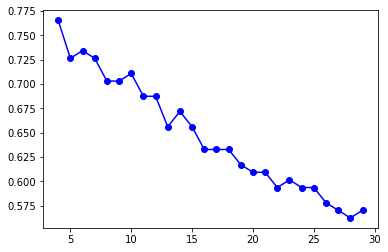

In [28]:
##Training accuracy plot
plt.plot(np.arange(4,30,1),[i[0] for i in acc],'bo-')


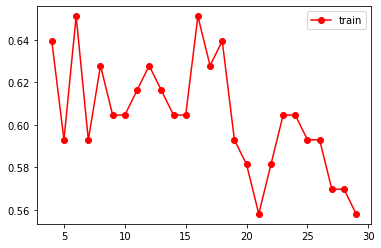

In [30]:
##Test accuracy plot

plt.plot(np.arange(4,30,1),[i[1] for i in acc],'ro-')
plt.legend(["train","test"])


In [32]:
model3 = KN(n_neighbors = 6)
model3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [33]:
pred_train = model3.predict(x_train)
cross_tab = pd.crosstab(y_train,pred_train)

In [34]:
pred_train

array([1, 2, 7, 7, 7, 2, 1, 1, 1, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5,
       2, 1, 1, 2, 1, 1, 1, 5, 1, 2, 1, 1, 1, 7, 1, 1, 2, 7, 2, 3, 2, 7,
       1, 7, 2, 2, 2, 2, 1, 7, 7, 7, 7, 1, 2, 1, 5, 2, 5, 1, 2, 1, 7, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 5, 1, 1, 2, 2, 1, 5, 1, 2,
       5, 1, 1, 1, 2, 1, 1, 2, 5, 5, 2, 2, 2, 1, 1, 2, 1, 7, 2, 1, 1, 1,
       1, 1, 2, 1, 3, 1, 7, 1, 2, 2, 1, 2, 1, 3, 2, 2, 1, 2], dtype=int64)

In [35]:
cross_tab

col_0,1,2,3,5,7
Type,,,,,
1,38,4,0,0,0
2,9,35,0,2,0
3,7,0,3,0,0
5,1,0,0,5,2
6,3,0,0,2,0
7,1,2,0,1,13


In [37]:
train_accuracy = np.mean(pred_train == y_train)
train_accuracy

0.734375

In [38]:
pred_test = model3.predict(x_test)
cross_tab_test = pd.crosstab(y_test,pred_test)

In [39]:
pred_test

array([7, 2, 1, 1, 2, 1, 1, 7, 7, 5, 1, 2, 1, 1, 2, 2, 1, 5, 2, 7, 7, 1,
       1, 2, 1, 2, 2, 2, 2, 6, 2, 5, 1, 2, 1, 1, 2, 2, 5, 2, 2, 1, 1, 1,
       2, 1, 3, 1, 1, 1, 2, 1, 2, 7, 7, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 7, 7, 2, 2, 7, 1, 2, 1, 1, 2, 7, 7, 5, 5, 1, 1, 1, 1],
      dtype=int64)

In [40]:
cross_tab_test

col_0,1,2,3,5,6,7
Type,,,,,,
1,25,2,1,0,0,0
2,6,20,0,4,0,0
3,3,4,0,0,0,0
5,0,2,0,2,0,1
6,2,0,0,0,0,2
7,0,2,0,0,1,9


In [42]:
test_accuracy=np.mean(pred_test ==y_test)
test_accuracy

0.6511627906976745